In [2]:
import numpy as np

In [7]:
import numpy as np
from dtw import dtw
from functools import reduce
import matplotlib.pyplot as plt

euclidean_norm = lambda x, y: np.abs(x - y)
euclidean_square = lambda x,y: np.square(x -y)

reduntant_format = '第{0}个音后多了{1}个音\n'
absent_format = '第{0}个音后少了{1}个音\n'
faster_format = '第{0}个音应该稍微快一些\n'
slower_format = '第{0}个音应该稍微慢一些\n'

In [5]:
# x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
# y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

# x = np.array([1,1.6,2.0,3,3.6]).reshape(-1, 1)
# y = np.array([1.2,1.7,1.8,2.1,3.1,3.7,4]).reshape(-1, 1)

x = np.array([1,1.6,2.0,3,3.6]).reshape(-1, 1)
y = np.array([1.2,1.7,1.8,2.1,3.1]).reshape(-1, 1)

x = x - x[0]
y = y - y[0]

#第一个参数为用户输入
#第二个参数为模板
d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

In [129]:
def path_counter(data):
    dict_data = {}
    for item in data:
        if(dict_data.get(item)):
            dict_data[item] +=1
        else:
            dict_data[item] = 1
    return dict_data

In [6]:
x

array([[0. ],
       [0.6],
       [1. ],
       [2. ],
       [2.6]])

In [130]:
cost_matrix

array([[0. , 0.5, 0.6, 0.9, 1.9],
       [0.6, 0.1, 0. , 0.3, 1.3],
       [1. , 0.5, 0.4, 0.1, 0.9],
       [2. , 1.5, 1.4, 1.1, 0.1],
       [2.6, 2.1, 2. , 1.7, 0.7]])

In [131]:
acc_cost_matrix

array([[0. , 0.5, 1.1, 2. , 3.9],
       [0.6, 0.1, 0.1, 0.4, 1.7],
       [1.6, 0.6, 0.5, 0.2, 1.1],
       [3.6, 2.1, 1.9, 1.3, 0.3],
       [6.2, 4.2, 3.9, 3. , 1. ]])

In [132]:
x

array([[0. ],
       [0.6],
       [1. ],
       [2. ],
       [2.6]])

In [133]:
y

array([[0. ],
       [0.5],
       [0.6],
       [0.9],
       [1.9]])

In [136]:
# path[0] 作为横坐标
# path[1] 作为纵坐标
# x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
# y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

# x = np.array([1,1.6,2.0,3,3.6]).reshape(-1, 1)
# y = np.array([1.2,1.7,1.8,2.1,3.1,3.7,4]).reshape(-1, 1)

x = np.array([1,1.6,2.0,3,3.6]).reshape(-1, 1)
y = np.array([1.2,1.7,1.8,2.1,3.1]).reshape(-1, 1)

x = x - x[0]
y = y - y[0]

#第一个参数为用户输入
#第二个参数为模板
d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

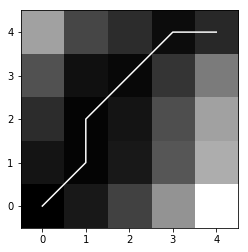

In [137]:
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

In [12]:
def path_counter(data):
    dict_data = {}
    for item in data:
        if(dict_data.get(item)):
            dict_data[item] +=1
        else:
            dict_data[item] = 1
    return dict_data

def get_reduntant(data):
    dict_counter = path_counter(data)
    result = {k:v for k,v in dict_counter.items() if v > 1}
    result_str = ""
    for k,v in result.items():
        result_str += reduntant_format.format(k,v-1)

    return result_str
    
def get_absent(data):
    dict_counter = path_counter(data)
    result = {k:v for k,v in dict_counter.items() if v > 1}
    result_str = ""
    for k,v in result.items():
        result_str += absent_format.format(k+1,v-1)

    return result_str

def get_diff_illustration(path):
    return get_absent(path[0]) + get_reduntant(path[1])

def reduce_result(path):
    a = list(zip(list(path[0]),list(path[1])))
    result_filter_key = {}
    result_filter_value = {}
    for k,v in a:
        if(result_filter_key.get(k)):
            pass
        else:
            result_filter_key[k] = v

    for k,v in result_filter_key.items():
        if(v in result_filter_value.values()):
            pass
        else:
            result_filter_value[k] = v
    return result_filter_value

def cal_point(point_map,user_data,teacher_data):
    speed_result = []
    play_str = ""
    threadhold = 0.2
    point = 0
    for k,v in point_map.items():
         speed_result.append((user_data[k] - teacher_data[v]) / teacher_data[v])

    for index in range(1,len(speed_result)):
        if(abs(speed_result[index][0]) > threadhold):
            point += abs(speed_result[index][0])
            if(speed_result[index] > 0):
                play_str +=slower_format.format(index)
            else:
                play_str +=faster_format.format(index)
                
    return round((1-point) * 100),play_str

def cal_diff(data_student,data_teacher):
    data_student = data_student - data_student[0]
    data_teacher = data_teacher - data_teacher[0]

    #第一个参数为用户输入
    #第二个参数为模板
    d, cost_matrix, acc_cost_matrix, path = dtw(data_student, data_teacher, dist=euclidean_norm)
    
    diff_illustration = get_diff_illustration(path)
    reduce_map = reduce_result(path)
    result = cal_point(reduce_map,data_student,data_teacher)
    return diff_illustration + result[1] , result[0]

In [13]:
x = np.array([1,1.6,2.0,3,3.6]).reshape(-1, 1)
y = np.array([1.2,1.7,1.8,2.1,3.1]).reshape(-1, 1)

def cal_diff(data_student,data_teacher):
    data_student = data_student - data_student[0]
    data_teacher = data_teacher - data_teacher[0]

    #第一个参数为用户输入
    #第二个参数为模板
    d, cost_matrix, acc_cost_matrix, path = dtw(data_student, data_teacher, dist=euclidean_norm)
    
    diff_illustration = get_diff_illustration(path)
    reduce_map = reduce_result(path)
    result = cal_point(reduce_map,data_student,data_teacher)
    return diff_illustration + result[1] , result[0]

In [298]:
result = cal_diff(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


In [299]:
print(result[0])

第2个音后少了1个音
第4个音后多了1个音
第1个音应该稍微慢一些



In [232]:
y

array([[0. ],
       [0.5],
       [0.6],
       [0.9],
       [1.9]])

In [179]:
set(path[1])

{0, 1, 2, 3, 4}

In [183]:
a = [0, 1, 1, 2, 3, 4]

In [186]:
a.remove(1)

In [187]:
a

[0, 2, 3, 4]

In [199]:
a = list(zip(list(path[0]),list(path[1])))

In [203]:
reduce(lambda x,y:)

[(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 4)]

In [201]:
map

map

In [226]:
def reduce_result(path):
    a = list(zip(list(path[0]),list(path[1])))
    result_filter_key = {}
    result_filter_value = {}
    for k,v in a:
        if(result_filter_key.get(k)):
            pass
        else:
            result_filter_key[k] = v

    for k,v in result_filter_key.items():
        if(v in result_filter_value.values()):
            pass
        else:
            result_filter_value[k] = v

In [229]:
reduce_result(path)

{0: 0, 1: 1, 2: 3, 3: 4}

In [237]:
import math

In [289]:
def cal_point(point_map,user_data,teacher_data):
    speed_result = []
    play_str = ""
    threadhold = 0.2
    point = 0
    for k,v in point_map.items():
         speed_result.append((user_data[k] - teacher_data[v]) / teacher_data[v])

    for index in range(1,len(speed_result)):
        if(abs(speed_result[index][0]) > threadhold):
            point += abs(speed_result[index][0])
            if(speed_result[index] > 0):
                play_str +=slower_format.format(index)
            else:
                play_str +=faster_format.format(index)
                
    return round((1-point) * 100),play_str

In [290]:
cal_point(result_filter_value,x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


(80.0, '第1个音应该稍微慢一些\n')

In [268]:
play_str

'第1个音应该稍微慢一些\n'

In [257]:
range(2)

range(0, 2)

In [224]:
x

array([[0. ],
       [0.6],
       [1. ],
       [2. ],
       [2.6]])

In [225]:
 y

array([[0. ],
       [0.5],
       [0.6],
       [0.9],
       [1.9]])

In [18]:
data_teacher = np.array([[2.23],[3.51],[4.9],[7.14],[9.63],[10.64],[11.63],[13.74],[14.86],[15.21],[15.9],[16.59],[18.75],[19.3],[19.81],[21.91],[24.05],[24.23],[25.67],[26.69],[26.97],[28.48],[28.85],[30.02],[31.25],[35.92]])
#data_teacher = np.array([[10.64],[11.63],[13.74],[14.86],[15.21],[15.9],[16.59],[18.75],[19.3],[19.81],[21.91],[24.05],[24.23],[25.67],[26.69],[26.97],[28.48],[28.85],[30.02],[31.25],[35.92]])

In [1]:
ｘ

NameError: name 'np' is not defined

In [20]:
cal_diff(data_student,data_teacher)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide


('第8个音后少了1个音\n第20个音后少了1个音\n第22个音后少了1个音\n第1个音后多了1个音\n第3个音后多了1个音\n第7个音后多了1个音\n第13个音后多了1个音\n第1个音应该稍微快一些\n',
 71.0)

In [21]:
d, cost_matrix, acc_cost_matrix, path = dtw(data_student, data_teacher, dist=euclidean_norm)

In [22]:
reduce_result(path)

{0: 0,
 3: 1,
 4: 2,
 6: 3,
 7: 4,
 8: 6,
 9: 7,
 10: 8,
 11: 9,
 12: 10,
 14: 11,
 15: 12,
 16: 13,
 17: 14,
 18: 15,
 19: 16,
 20: 17,
 21: 18}